In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import IFrame
import seaborn as sns
from sklearn.model_selection import train_test_split

#  read data

In [2]:
data = pd.read_csv("insurance.csv")

In [3]:
data.shape

(1338, 7)

In [4]:

data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# describe data

In [5]:
print('***********************data.describe************************* ')
print(data.describe())

***********************data.describe************************* 
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


# Turn data to binary value

In [6]:
#Turn data to binary value
data['sex'] = data['sex'].map({'male':0,'female':1})
data['smoker'] = data['smoker'].map({'yes':1,'no':0})
data['region'] = data['region'].map({'southwest':1,'southeast':2 ,'northwest':3 ,'northeast':4})

In [7]:
print("******************converted data to binary**********************")

data.head(10)

******************converted data to binary**********************


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
5,31,1,25.740,0,0,2,3756.62160
6,46,1,33.440,1,0,2,8240.58960
7,37,1,27.740,3,0,3,7281.50560
8,37,0,29.830,2,0,4,6406.41070
9,60,1,25.840,0,0,3,28923.13692


In [8]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,0.004588,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


# correlation matrix

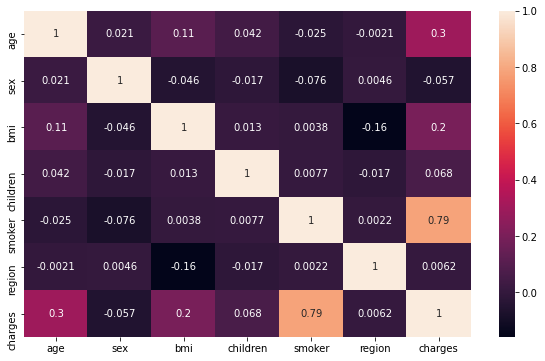

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True)
plt.show()


# drop sex

In [10]:
data.drop('sex' , axis=1 , inplace=True)

In [11]:
#Turn data to binary value
#data['smoker'] = data['smoker'].map({'yes':1,'no':0})
#data['region'] = data['region'].map({'southwest':1,'southeast':2 ,'northwest':3 ,'northeast':4})

# rescaling data

In [12]:
# rescaling data
data = (data - data.mean()) / data.std()

In [13]:
print('*********************data after normalization**************** ')
print(data.head(10) )

*********************data after normalization**************** 
        age       bmi  children    smoker    region   charges
0 -1.438227 -0.453151 -0.908274  1.969850 -1.343402  0.298472
1 -1.509401  0.509431 -0.078738 -0.507273 -0.438331 -0.953333
2 -0.797655  0.383164  1.580335 -0.507273 -0.438331 -0.728402
3 -0.441782 -1.305043 -0.908274 -0.507273  0.466741  0.719574
4 -0.512957 -0.292447 -0.908274 -0.507273  0.466741 -0.776512
5 -0.584132 -0.807354 -0.908274 -0.507273 -0.438331 -0.785615
6  0.483487  0.455316 -0.078738 -0.507273 -0.438331 -0.415345
7 -0.157084 -0.479388  1.580335 -0.507273  0.466741 -0.494543
8 -0.157084 -0.136663  0.750799 -0.507273  1.371813 -0.566805
9  1.479931 -0.790956 -0.908274 -0.507273  0.466741  1.292543


In [14]:
print('***********************data.describe after nomaliz************************* ')
print(data.describe())

***********************data.describe after nomaliz************************* 
                age           bmi      children        smoker        region  \
count  1.338000e+03  1.338000e+03  1.338000e+03  1.338000e+03  1.338000e+03   
mean  -1.810543e-16  1.553275e-15 -2.540735e-16 -1.908455e-17 -2.398015e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.509401e+00 -2.411110e+00 -9.082741e-01 -5.072734e-01 -1.343402e+00   
25%   -8.688299e-01 -7.161386e-01 -9.082741e-01 -5.072734e-01 -4.383307e-01   
50%   -1.473495e-02 -4.319265e-02 -7.873775e-02 -5.072734e-01 -4.383307e-01   
75%    8.393600e-01  6.609101e-01  7.507986e-01 -5.072734e-01  4.667410e-01   
max    1.764630e+00  3.684145e+00  3.239407e+00  1.969850e+00  1.371813e+00   

            charges  
count  1.338000e+03  
mean  -9.459299e-17  
std    1.000000e+00  
min   -1.003182e+00  
25%   -7.043871e-01  
50%   -3.210888e-01  
75%    2.782401e-01  
max    4.170104e+00  


# add ones column

In [15]:
# add ones column
data.insert(0, 'Ones', 1)

In [16]:
print('*********************data after added 1**************** ')
print(data.head(2) )

*********************data after added 1**************** 
   Ones       age       bmi  children    smoker    region   charges
0     1 -1.438227 -0.453151 -0.908274  1.969850 -1.343402  0.298472
1     1 -1.509401  0.509431 -0.078738 -0.507273 -0.438331 -0.953333


# separate X (training data) from y (target variable)

In [17]:
# separate X (training data) from y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1 ]
Y = data.iloc[:,cols-1:cols]

In [18]:
X.head(2)

,Ones,age,bmi,children,smoker,region
0,1,-1.438227,-0.453151,-0.908274,1.969850,-1.343402
1,1,-1.509401,0.509431,-0.078738,-0.507273,-0.438331


# split the full  into training & test sets

In [19]:
# split the full  into training & test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.67, random_state=42)

# split the training data  into training:validation sets

In [20]:
# split the training data  into training:validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, train_size=0.8, random_state=42)

In [21]:
X_train.head(2)

,Ones,age,bmi,children,smoker,region
1208,1,-0.157084,-0.837691,-0.078738,1.969850,1.371813
272,1,0.127614,1.047295,0.750799,-0.507273,0.466741


# convert to matrices and initialize waights

In [22]:
# convert to matrices and initialize theta
X_train_matrix = np.matrix(X_train.values)
Y_train_matrix = np.matrix(Y_train.values)

X_test_matrix = np.matrix(X_test.values)
Y_test_matrix = np.matrix(Y_test.values)

waights = np.matrix(np.array([0,0,0,0,0,0]))

In [23]:
print( (X_train_matrix * waights.T) - Y_train_matrix)

[[-5.80217561e-01]
 [ 4.95847580e-01]
 [ 1.73823506e-01]
 [ 9.92403312e-01]
 [ 5.91086926e-01]
 [ 4.37039078e-02]
 [ 5.34562594e-01]
 [-2.17398518e+00]
 [-7.96572122e-02]
 [ 9.61447482e-01]
 [ 7.10910646e-01]
 [-2.20750497e+00]
 [-1.73680639e+00]
 [ 9.52356364e-01]
 [ 4.75011691e-01]
 [-1.68969822e+00]
 [-3.69783632e-01]
 [ 2.04299729e-01]
 [-7.54931276e-01]
 [-3.54248844e-01]
 [ 6.62623272e-01]
 [ 1.60504178e-01]
 [-2.32427962e-01]
 [ 1.89444623e-01]
 [ 3.69267144e-01]
 [ 1.43315277e-01]
 [ 2.82022105e-01]
 [-1.93374807e-01]
 [ 9.38140733e-01]
 [-4.69429614e-01]
 [ 3.61624996e-01]
 [ 1.30319834e-02]
 [ 6.55905421e-01]
 [ 3.82866822e-03]
 [-9.78712374e-02]
 [ 9.91508020e-01]
 [ 1.18699159e-02]
 [ 2.51373678e-01]
 [ 9.58332939e-01]
 [-9.30244908e-01]
 [ 6.82711139e-01]
 [-3.82667257e-01]
 [-6.87444451e-01]
 [ 9.61236826e-01]
 [ 4.64049818e-01]
 [ 8.18905265e-01]
 [ 8.25893174e-01]
 [ 5.38701380e-01]
 [-2.75215980e+00]
 [-2.18456410e+00]
 [ 9.99748004e-01]
 [ 3.91650360e-01]
 [ 8.7373386

# compute Cost function

In [24]:
def computeCost(X_train_matrix, Y_train_matrix, waights):
    innervalue = np.power(((X_train_matrix * waights.T) - Y_train_matrix), 2)
    return np.sum(innervalue) / (2 * len(X_train_matrix))

In [25]:
computeCost(X_train_matrix, Y_train_matrix, waights) #we want to decrees this cost(error)

0.515116398636536

# initialize variables for learning rate and iterations

In [26]:
# initialize variables for learning rate and iterations
alpha = 0.01
n_iterations = 600

# gradient Descent function

In [27]:
def gradientDescent(X_train_matrix, Y_train_matrix, waights, alpha, n_iterations):
    temp = np.matrix(np.zeros(waights.shape))
    num_waights = int(waights.ravel().shape[1])
    cost = np.zeros(n_iterations) #zero matrix with size 1000 
    
    for i in range(n_iterations):
        error = (X_train_matrix * waights.T) - Y_train_matrix
        
        for j in range(num_waights):
            term = np.multiply(error, X_train_matrix[:,j])
            temp[0,j] = waights[0,j] - ((alpha / len(X)) * np.sum(term))
            
        waights = temp
        cost[i] = computeCost(X_train_matrix, Y_train_matrix, waights)
        
    return waights, cost

In [28]:
updated_waights, updated_cost = gradientDescent(X_train_matrix, Y_train_matrix, waights, alpha, n_iterations)

# updated_waights

In [29]:
print("***********************updated_waights************************")
updated_waights

***********************updated_waights************************


matrix([[0.00799671, 0.29526949, 0.17411272, 0.03204205, 0.75869477,
         0.04013721]])

# final_updated_cost_train

In [30]:
print("***********************final_updated_cost_train************************")
final_updated_cost=computeCost(X_train_matrix, Y_train_matrix, updated_waights)
final_updated_cost

***********************final_updated_cost_train************************


0.12951810947702735

# draw cost graph

Text(0.5, 1.0, 'cost vs. Iterations')

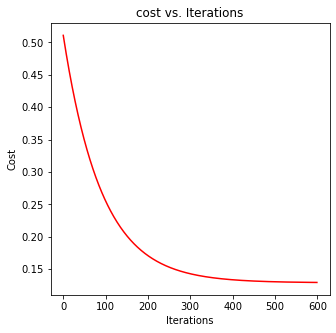

In [31]:
# draw cost graph

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(np.arange(n_iterations), updated_cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('cost vs. Iterations')


In [32]:
my_pre=(X_test_matrix * updated_waights.T)

In [33]:
print(my_pre)

[[-0.33271009]
 [-0.47300607]
 [ 1.90530456]
 [-0.30516703]
 [ 1.10335597]
 [-0.19336747]
 [-1.04455207]
 [ 0.34056202]
 [-0.96826576]
 [-0.15803565]
 [ 1.1269068 ]
 [-0.29849319]
 [-0.64214002]
 [ 2.01198516]
 [ 2.18563585]
 [ 1.90906   ]
 [ 0.1784935 ]
 [ 1.81652587]
 [-0.32884283]
 [ 1.46397525]
 [-0.81866797]
 [-0.2717273 ]
 [-0.89207716]
 [-0.4515216 ]
 [-0.15329436]
 [ 0.01755038]
 [ 0.10375809]
 [-0.57155749]
 [-0.24999276]
 [-0.8841892 ]
 [-0.3758344 ]
 [ 0.0198588 ]
 [-0.6860933 ]
 [-0.80687419]
 [-0.72980797]
 [ 0.03183907]
 [-0.93767198]
 [-0.37539654]
 [ 1.60103689]
 [ 1.54452465]
 [-0.81056975]
 [-0.702672  ]
 [ 0.06626149]
 [-0.11984049]
 [-0.35561967]
 [-0.10766937]
 [-0.6320101 ]
 [-0.86040743]
 [ 1.7667792 ]
 [-0.32227493]
 [ 0.23739404]
 [-0.87959385]
 [-0.03687558]
 [-0.92616959]
 [ 0.03689287]
 [-0.02962665]
 [-0.6929682 ]
 [ 1.50580661]
 [ 0.00462361]
 [ 0.01280908]
 [ 0.072585  ]
 [-0.20824176]
 [ 0.23306545]
 [-0.43750898]
 [-0.07601654]
 [-0.73118458]
 [ 1.00146

# mean_squared_error

In [34]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test , my_pre)

0.24088759899999748

In [35]:
print("***********************cost_test************************")
cost_test=computeCost(X_test_matrix, Y_test_matrix, waights)
cost_test

***********************cost_test************************


0.4998000214065829

# final_updated_cost_test

In [36]:
print("***********************final_updated_cost_test************************")
final_updated_cost_test=computeCost(X_test_matrix, Y_test_matrix, updated_waights)
final_updated_cost_test

***********************final_updated_cost_test************************


0.12044379949999874